### The described Spam Detection System (SDS) seems to be well-designed, utilizing a thorough feature extraction process to transform text data into meaningful feature vectors. These vectors capture crucial characteristics of both legitimate and spam messages, including lexical, syntactic, and semantic attributes. The use of a multi-layered machine learning model incorporating algorithms like Support Vector Machines, Random Forest, and Gradient Boosting indicates a robust approach to classification. Training the model on a diverse dataset with labeled examples of spam and non-spam messages is a crucial step in enabling it to recognize complex patterns and adapt to evolving spamming tactics. This comprehensive system appears poised to effectively discern between spam and non-spam content.

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import joblib
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import joblib
# Download stopwords and tokenizer data from NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mrsoh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mrsoh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:

# Load the dataset containing labeled messages (spam and non-spam)
data = pd.read_csv('data/sms.csv')
data.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [3]:
# Text preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation and numbers
    text = ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])
    
    # Tokenization (split text into words)
    tokens = word_tokenize(text)
    
    # Remove stopwords (common words like "the", "and", "is")
    tokens = [word for word in tokens if word not in stop_words]
    
    # Rejoin tokens into a single string
    text = ' '.join(tokens)
    
    return text


In [4]:
# Apply text preprocessing to the 'sms' column
data['sms'] = data['sms'].apply(preprocess_text)

# Create a TF-IDF vectorizer to convert text data into feature vectors
vectorizer = joblib.load('smsTfidfVectorizer1.sav')
X = vectorizer.fit_transform(data['sms'].values)
y = data['label'].values






# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train different classifiers: Random Forest, SVM, Gradient Boosting
random_forest = RandomForestClassifier()
svm = SVC(probability=True)  # Enable probability estimates for VotingClassifier
gradient_boosting = GradientBoostingClassifier()

random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

# Make predictions on the test set for each model
rf_predictions = random_forest.predict(X_test)
svm_predictions = svm.predict(X_test)
gb_predictions = gradient_boosting.predict(X_test)


In [5]:
# Calculate evaluation metrics (Accuracy, Precision, Recall, F1-Score, Confusion Matrix) for each model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_confusion = confusion_matrix(y_test, rf_predictions)

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)
svm_confusion = confusion_matrix(y_test, svm_predictions)

gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_precision = precision_score(y_test, gb_predictions)
gb_recall = recall_score(y_test, gb_predictions)
gb_f1 = f1_score(y_test, gb_predictions)
gb_confusion = confusion_matrix(y_test, gb_predictions)

In [6]:
# Print evaluation metrics for each individual model
print("Random Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-Score:", rf_f1)
print("Confusion Matrix:")
print(rf_confusion)

print("\nSVM Metrics:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-Score:", svm_f1)
print("Confusion Matrix:")
print(svm_confusion)

print("\nGradient Boosting Metrics:")
print("Accuracy:", gb_accuracy)
print("Precision:", gb_precision)
print("Recall:", gb_recall)
print("F1-Score:", gb_f1)
print("Confusion Matrix:")
print(gb_confusion)


Random Forest Metrics:
Accuracy: 0.9802690582959641
Precision: 0.986013986013986
Recall: 0.8757763975155279
F1-Score: 0.9276315789473684
Confusion Matrix:
[[952   2]
 [ 20 141]]

SVM Metrics:
Accuracy: 0.9820627802690582
Precision: 0.9862068965517241
Recall: 0.8881987577639752
F1-Score: 0.934640522875817
Confusion Matrix:
[[952   2]
 [ 18 143]]

Gradient Boosting Metrics:
Accuracy: 0.968609865470852
Precision: 0.9632352941176471
Recall: 0.8136645962732919
F1-Score: 0.8821548821548821
Confusion Matrix:
[[949   5]
 [ 30 131]]


In [13]:
# Create an ensemble of models using a VotingClassifier with a "soft" voting strategy
#ensemble = VotingClassifier(estimators=[
#    ('Random Forest', random_forest),
#    ('SVM', svm),
#    ('Gradient Boosting', gradient_boosting)
#], voting='soft')

#ensemble.fit(X_train, y_train)

#joblib.dump(ensemble,'smsmodel1.sav')
ensemble=joblib.load('smsmodel1.sav')
ensemble_predictions = ensemble.predict(X_test)

# Calculate evaluation metrics for the ensemble
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
ensemble_precision = precision_score(y_test, ensemble_predictions)
ensemble_recall = recall_score(y_test, ensemble_predictions)
ensemble_f1 = f1_score(y_test, ensemble_predictions)
ensemble_confusion = confusion_matrix(y_test, ensemble_predictions)

# Print evaluation metrics for the ensemble
print("\nEnsemble Metrics:")
print("Accuracy:", ensemble_accuracy)
print("Precision:", ensemble_precision)
print("Recall:", ensemble_recall)
print("F1-Score:", ensemble_f1)
print("Confusion Matrix:")
print(ensemble_confusion)


Ensemble Metrics:
Accuracy: 0.9838565022421525
Precision: 0.9863945578231292
Recall: 0.9006211180124224
F1-Score: 0.9415584415584415
Confusion Matrix:
[[952   2]
 [ 16 145]]


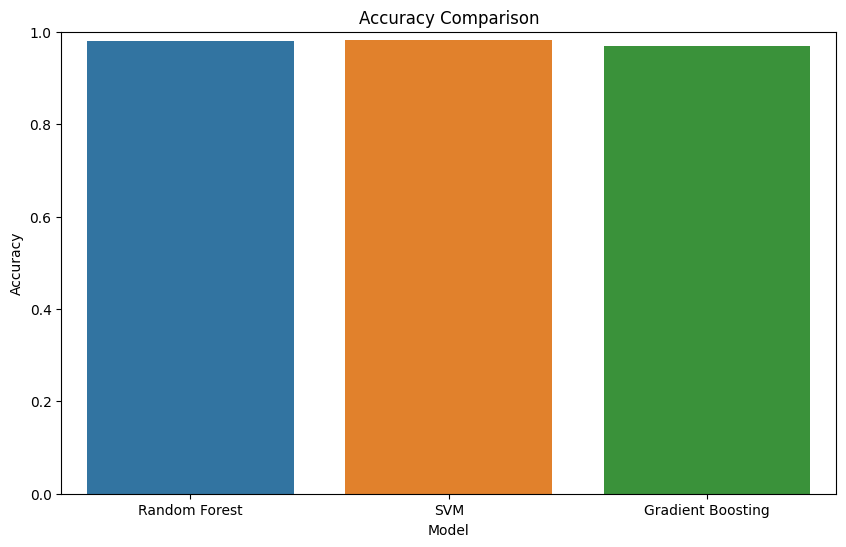

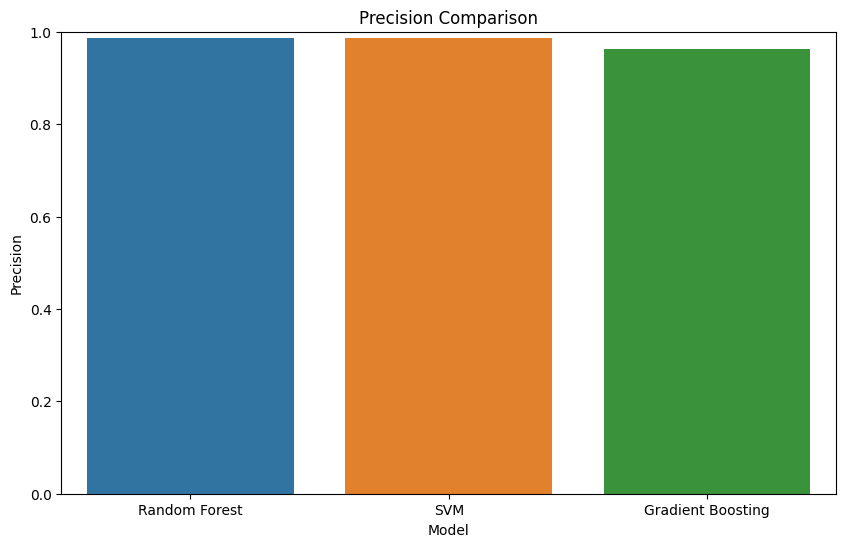

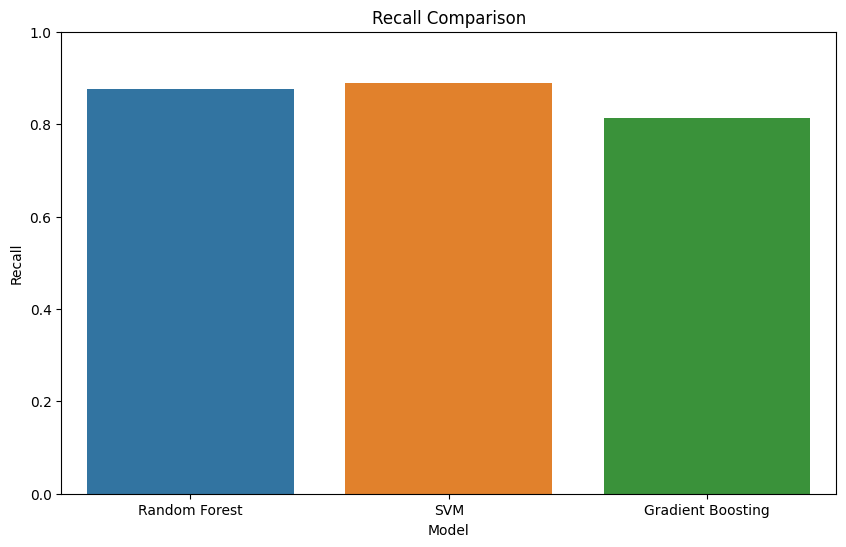

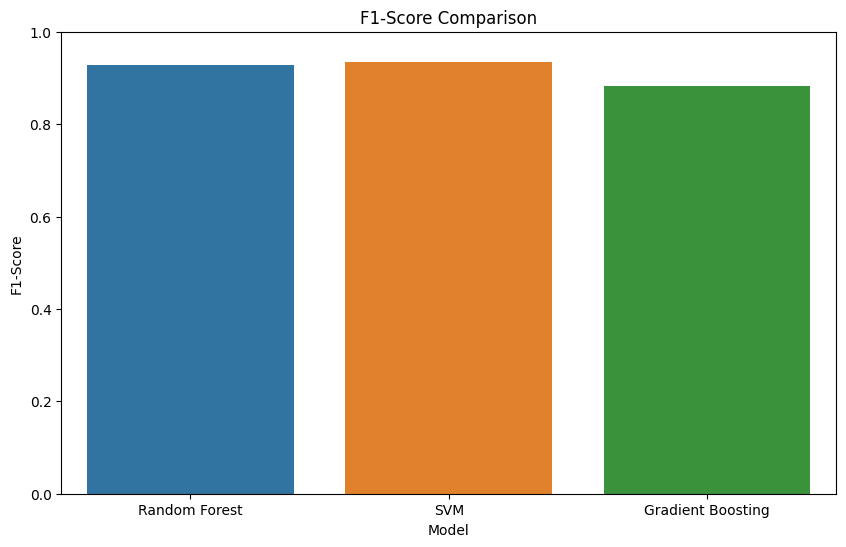

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize performance metrics using Seaborn
metrics_data = {
    'Model': ['Random Forest', 'SVM', 'Gradient Boosting'],
    'Accuracy': [rf_accuracy, svm_accuracy, gb_accuracy],
    'Precision': [rf_precision, svm_precision, gb_precision],
    'Recall': [rf_recall, svm_recall, gb_recall],
    'F1-Score': [rf_f1, svm_f1, gb_f1]
}

metrics_df = pd.DataFrame(metrics_data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=metrics_df)
plt.title('Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Precision', data=metrics_df)
plt.title('Precision Comparison')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Recall', data=metrics_df)
plt.title('Recall Comparison')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-Score', data=metrics_df)
plt.title('F1-Score Comparison')
plt.ylim(0, 1)
plt.show()

<Figure size 1600x600 with 0 Axes>

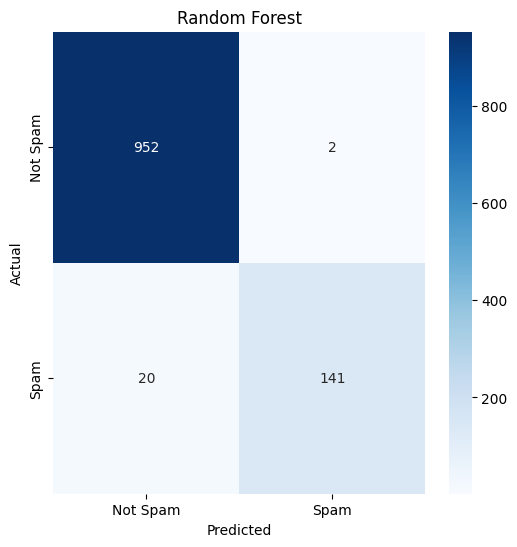

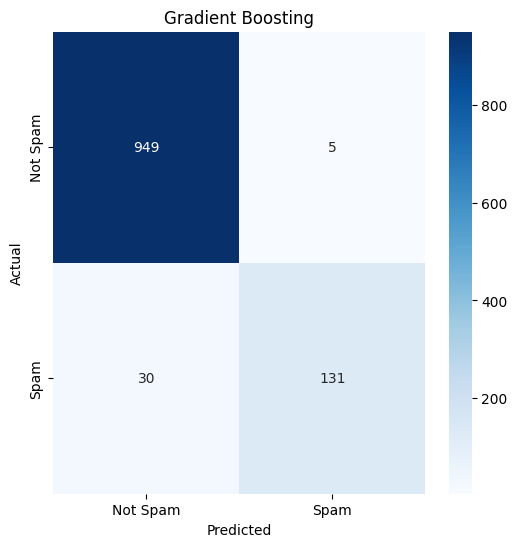

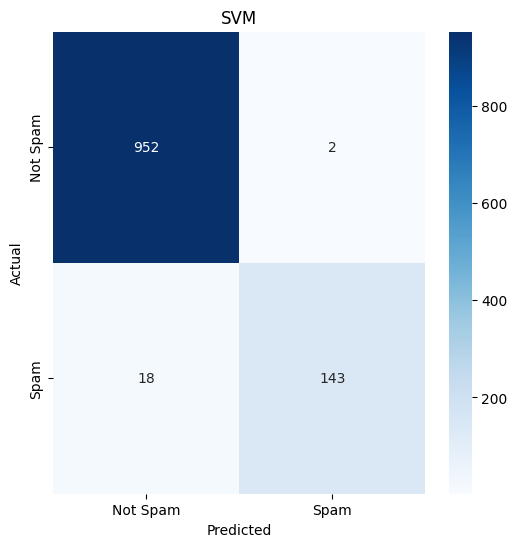

In [9]:
# Visualize confusion matrices using Seaborn
def plot_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)

plt.figure(figsize=(16, 6))
plot_confusion_matrix(rf_confusion, ['Not Spam', 'Spam'], 'Random Forest')
plot_confusion_matrix(gb_confusion, ['Not Spam', 'Spam'], 'Gradient Boosting')


plot_confusion_matrix(svm_confusion, ['Not Spam', 'Spam'], 'SVM')


In [10]:

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

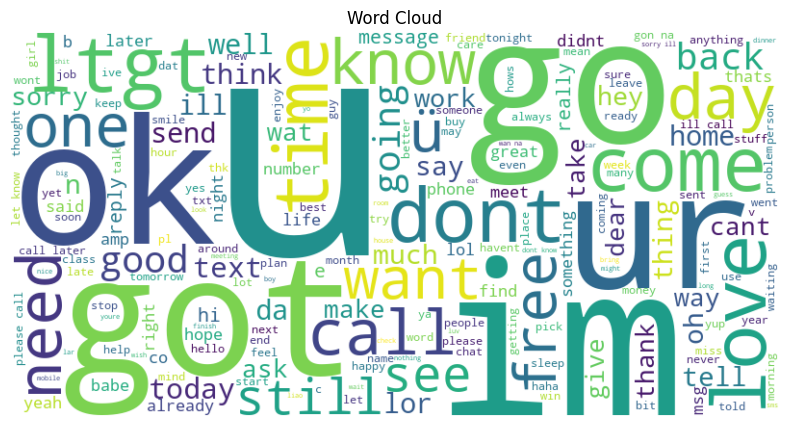

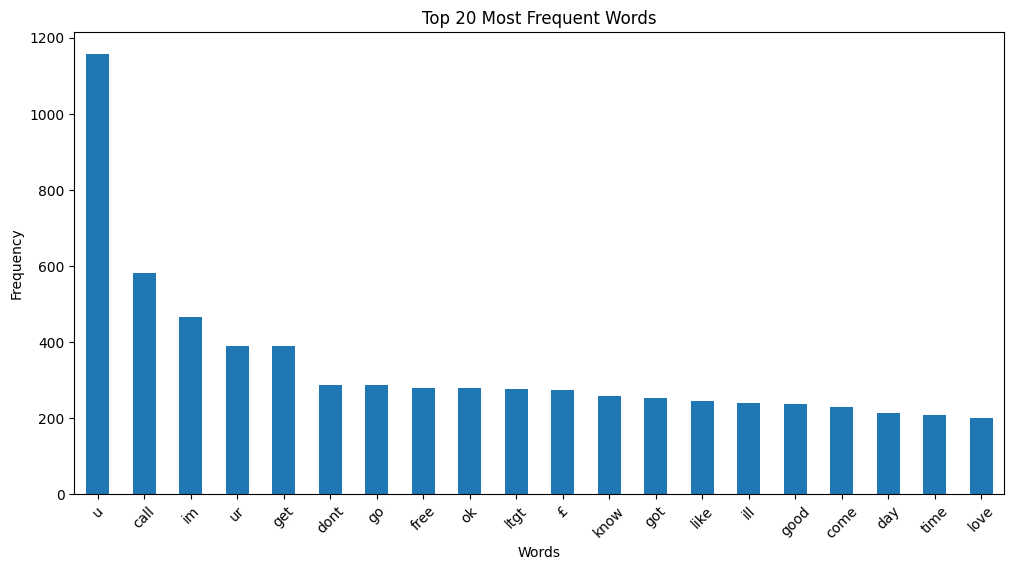

In [11]:
from wordcloud import WordCloud
# Assuming 'sms' column contains your text data
text_data = " ".join(data['sms'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

# Create a bar plot for the most frequent words
word_freq = pd.Series(text_data.split()).value_counts()[:20]
word_freq.plot(kind='bar', figsize=(12, 6))
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()